In [1]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import openweathermapy.core as owm
#import os
#import csv
import seaborn as sns

import gmaps
import gmaps.geojson_geometries

from Project_Gas_Library import f_EIA_ListSeries, f_EIA_ExtractData, f_PlotData, f_EIA_PlotData, \
f_WorldWeather_ExtractData, f_PlotData, f_Census_ExtractData, calculate_color

from datetime import datetime
from dateutil.relativedelta import relativedelta
from calendar import monthrange

from config import worldweather_key, g_key, EIA_key, census_key

from matplotlib.pyplot import cm
from citipy import citipy
from pprint import pprint

from matplotlib.cm import viridis
from matplotlib.colors import to_hex

from census import Census

In [2]:
url = "http://api.eia.gov/category/"
category_id = "714805" #Natural Gas
eia_api_key = EIA_key

list_ser = f_EIA_ListSeries(url,eia_api_key,category_id)
df = pd.DataFrame(list_ser)
df.to_csv("../../Data/CSV_Files/EIA_Series_ID.csv", encoding='utf-8')
df

,f,name,series_id,units,updated
0,A,U.S. Total Natural Gas Injections into Undergr...,NG.N5050US2.A,Million Cubic Feet,30-APR-19 01.42.23 PM
1,M,U.S. Total Natural Gas Injections into Undergr...,NG.N5050US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
2,A,U.S. Natural Gas Underground Storage Withdraw...,NG.N5060US2.A,Million Cubic Feet,30-APR-19 01.42.23 PM
3,M,U.S. Natural Gas Underground Storage Withdraw...,NG.N5060US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
4,A,"U.S. Dry Natural Gas Production, Annual",NG.N9070US2.A,Million Cubic Feet,28-JUN-19 12.40.59 PM
5,M,"U.S. Dry Natural Gas Production, Monthly",NG.N9070US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
6,A,"U.S. Natural Gas Input Supplemental Fuels, Annual",NG.N9090US2.A,Million Cubic Feet,28-JUN-19 12.40.59 PM
7,M,"U.S. Natural Gas Input Supplemental Fuels, Mon...",NG.N9090US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
8,A,"U.S. Natural Gas Total Consumption, Annual",NG.N9140US2.A,Million Cubic Feet,28-JUN-19 12.40.59 PM
9,M,"U.S. Natural Gas Total Consumption, Monthly",NG.N9140US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM


In [3]:
df_ng_consump = df.loc[(df["name"].str.contains("Consumption|Deliveries to Electric Power Consumers")==True) & (df["f"]=="M")]
df_ng_consump

,f,name,series_id,units,updated
9,M,"U.S. Natural Gas Total Consumption, Monthly",NG.N9140US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
772,M,"U.S. Natural Gas Total Consumption, Monthly",NG.N9140US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1023,M,"U.S. Natural Gas Residential Consumption, Monthly",NG.N3010US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1031,M,"U.S. Natural Gas Vehicle Fuel Consumption, Mon...",NG.N3025US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1033,M,"U.S. Natural Gas Industrial Consumption, Monthly",NG.N3035US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1037,M,U.S. Natural Gas Deliveries to Electric Power ...,NG.N3045US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1098,M,"U.S. Natural Gas Total Consumption, Monthly",NG.N9140US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1100,M,U.S. Natural Gas Lease and Plant Fuel Consumpt...,NG.N9160US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1159,M,"Alabama Natural Gas Residential Consumption, M...",NG.N3010AL2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1167,M,"Alabama Natural Gas Industrial Consumption, Mo...",NG.N3035AL2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM


In [4]:
df_ng_consump = df_ng_consump.drop_duplicates(subset="series_id",keep="first")
df_ng_consump

,f,name,series_id,units,updated
9,M,"U.S. Natural Gas Total Consumption, Monthly",NG.N9140US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1023,M,"U.S. Natural Gas Residential Consumption, Monthly",NG.N3010US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1031,M,"U.S. Natural Gas Vehicle Fuel Consumption, Mon...",NG.N3025US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1033,M,"U.S. Natural Gas Industrial Consumption, Monthly",NG.N3035US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1037,M,U.S. Natural Gas Deliveries to Electric Power ...,NG.N3045US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1100,M,U.S. Natural Gas Lease and Plant Fuel Consumpt...,NG.N9160US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1159,M,"Alabama Natural Gas Residential Consumption, M...",NG.N3010AL2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1167,M,"Alabama Natural Gas Industrial Consumption, Mo...",NG.N3035AL2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1171,M,Alabama Natural Gas Deliveries to Electric Pow...,NG.N3045AL2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1217,M,"Alabama Natural Gas Vehicle Fuel Consumption, ...",NG.NA1570_SAL_2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM


In [5]:
df_ng_consump = df_ng_consump.drop_duplicates(subset="name",keep="first")
df_ng_consump

,f,name,series_id,units,updated
9,M,"U.S. Natural Gas Total Consumption, Monthly",NG.N9140US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1023,M,"U.S. Natural Gas Residential Consumption, Monthly",NG.N3010US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1031,M,"U.S. Natural Gas Vehicle Fuel Consumption, Mon...",NG.N3025US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1033,M,"U.S. Natural Gas Industrial Consumption, Monthly",NG.N3035US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1037,M,U.S. Natural Gas Deliveries to Electric Power ...,NG.N3045US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1100,M,U.S. Natural Gas Lease and Plant Fuel Consumpt...,NG.N9160US2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1159,M,"Alabama Natural Gas Residential Consumption, M...",NG.N3010AL2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1167,M,"Alabama Natural Gas Industrial Consumption, Mo...",NG.N3035AL2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1171,M,Alabama Natural Gas Deliveries to Electric Pow...,NG.N3045AL2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM
1217,M,"Alabama Natural Gas Vehicle Fuel Consumption, ...",NG.NA1570_SAL_2.M,Million Cubic Feet,28-JUN-19 12.40.59 PM


In [6]:
eia_api_key = EIA_key
url = "http://api.eia.gov/series/"

flag_ind = True
flag_elec = True
flag_fuel = True
flag_res = True
flag_tot = True

for ind, val in df_ng_consump.iterrows():
    series_id = val["series_id"]    
    valx, valy, title, country, unit = f_EIA_ExtractData(url,eia_api_key,series_id)
    valy = [x/1000 for x in valy]
    
    finpos = title.find("Natural") - 1
    data = pd.DataFrame({'Date':valx,'Area':[title[0:finpos]] * len(valx),'Consumption(Bscf)':valy})
    
    if "Industrial Consumption" in title:
#         data = pd.DataFrame({'Date':valx,'Area':[title[0:finpos]] * len(valx),'Industrial':valy})
        if flag_ind:
            df_ind = data
            flag_ind = False
        else:
            df_ind = pd.concat([df_ind, data])
    elif "Electric Power" in title:
#         data = pd.DataFrame({'Date':valx,'Area':[title[0:finpos]] * len(valx),'Electric':valy})
        if flag_elec:
            df_elec = data
            flag_elec = False
        else:
            df_elec = pd.concat([df_elec, data])
    elif "Fuel Consumption" in title:
#         data = pd.DataFrame({'Date':valx,'Area':[title[0:finpos]] * len(valx),'Fuel':valy})
        if flag_fuel:
            df_fuel = data
            flag_fuel = False
        else:
            df_fuel = pd.concat([df_fuel, data])
    elif "Residential Consumption" in title:
#         data = pd.DataFrame({'Date':valx,'Area':[title[0:finpos]] * len(valx),'Residential':valy})
        if flag_res:
            df_res = data
            flag_res = False
        else:
            df_res = pd.concat([df_res, data])
    elif "Total Consumption" in title:
        if flag_tot:
            df_tot = data
            flag_tot = False
        else:
            df_tot = pd.concat([df_tot, data])

df_ind.to_csv("../../Data/CSV_Files/Gas_Demand_Ind.csv", encoding='utf-8')
df_elec.to_csv("../../Data/CSV_Files/Gas_Demand_Elec.csv", encoding='utf-8')
df_fuel.to_csv("../../Data/CSV_Files/Gas_Demand_Fuel.csv", encoding='utf-8')
df_res.to_csv("../../Data/CSV_Files/Gas_Demand_Res.csv", encoding='utf-8')
df_tot.to_csv("../../Data/CSV_Files/Gas_Demand_Tot.csv", encoding='utf-8')

In [7]:
print(df_ind.shape)
print(df_elec.shape)
print(df_fuel.shape)
print(df_res.shape)
print("============================================")
print(df_tot.shape)
print("============================================")
print(df_ind.loc[df_ind["Area"]=="U.S."].shape)
print(df_elec.loc[df_elec["Area"]=="U.S."].shape)
print(df_fuel.loc[df_fuel["Area"]=="U.S."].shape)
print(df_res.loc[df_res["Area"]=="U.S."].shape)

(11396, 3)
(11022, 3)
(6452, 3)
(19102, 3)
(220, 3)
(220, 3)
(220, 3)
(740, 3)
(556, 3)


In [8]:
df_tot_US = df_tot.set_index("Date")
df_ind_US = df_ind.loc[df_ind["Area"]=="U.S."].set_index("Date")
df_elec_US = df_elec.loc[df_elec["Area"]=="U.S."].set_index("Date")
df_fuel_US = df_fuel.loc[df_fuel["Area"]=="U.S."].set_index("Date")
df_res_US = df_res.loc[df_res["Area"]=="U.S."].set_index("Date")

In [9]:
df_tot_US.rename(columns={'Consumption(Bscf)': 'Total'}, inplace=True)
df_tot_US = df_tot_US.drop('Area', axis=1)
df_ind_US.rename(columns={'Consumption(Bscf)': 'Industrial'}, inplace=True)
df_ind_US = df_ind_US.drop('Area', axis=1)
df_elec_US.rename(columns={'Consumption(Bscf)': 'Electric'}, inplace=True)
df_elec_US = df_elec_US.drop('Area', axis=1)
df_fuel_US.rename(columns={'Consumption(Bscf)': 'Fuel'}, inplace=True)
df_fuel_US = df_fuel_US.drop('Area', axis=1)
df_res_US.rename(columns={'Consumption(Bscf)': 'Residential'}, inplace=True)
df_res_US = df_res_US.drop('Area', axis=1)

In [10]:
df_natgasdata = df_tot_US.merge(df_ind_US, how='outer', left_index=True, right_index=True)
df_natgasdata = df_natgasdata.merge(df_elec_US, how='outer', left_index=True, right_index=True)
df_natgasdata = df_natgasdata.merge(df_res_US, how='outer', left_index=True, right_index=True)
df_natgasdata

,Total,Industrial,Electric,Residential
Date,,,,
1973-01-01,NaN,NaN,NaN,843.900
1973-02-01,NaN,NaN,NaN,747.331
1973-03-01,NaN,NaN,NaN,648.504
1973-04-01,NaN,NaN,NaN,465.867
1973-05-01,NaN,NaN,NaN,326.313
1973-06-01,NaN,NaN,NaN,207.172
1973-07-01,NaN,NaN,NaN,150.349
1973-08-01,NaN,NaN,NaN,142.498
1973-09-01,NaN,NaN,NaN,159.378


In [11]:
df_natgasdata = df_natgasdata.dropna()

In [12]:
col_list = list(df_natgasdata.columns)
col_list.remove("Total")
df_natgasdata["Commercial"] = df_natgasdata["Total"].subtract(df_natgasdata[col_list].sum(axis=1), fill_value=0)
df_natgasdata    

C:\Users\Asterion\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Total,Industrial,Electric,Residential,Commercial
Date,,,,,
2001-01-01,2676.998,686.540,340.292,976.677,673.489
2001-02-01,2309.464,640.026,312.843,780.482,576.113
2001-03-01,2246.633,664.918,362.843,681.884,536.988
2001-04-01,1807.170,622.054,384.494,400.728,399.894
2001-05-01,1522.382,576.532,433.923,209.327,302.600
2001-06-01,1444.378,536.820,492.819,146.837,267.902
2001-07-01,1598.071,570.067,634.425,123.777,269.802
2001-08-01,1669.178,589.875,686.753,116.934,275.616
2001-09-01,1494.128,578.590,510.262,127.482,277.794


<Figure size 720x288 with 0 Axes>

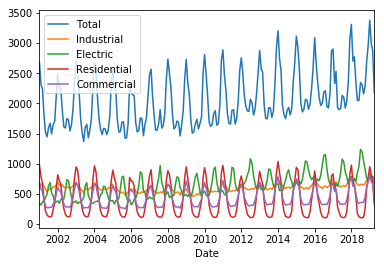

In [13]:
plt.figure(figsize=(10,4))
df_natgasdata.plot()

In [14]:
df_natgasdata.to_csv("../../Data/CSV_Files/Nat_Gas_Data.csv", encoding='utf-8')

In [15]:
df_natgasdata.shape

(220, 5)

In [16]:
df_ng_price = df.loc[(df["name"].str.contains("Price")==True) & (df["f"]=="M")]
df_ng_price = df_ng_price.drop_duplicates(subset="series_id",keep="first")
df_ng_price

,f,name,series_id,units,updated
1025,M,U.S. Price of Natural Gas Delivered to Residen...,NG.N3010US3.M,Dollars per Thousand Cubic Feet,28-JUN-19 12.40.59 PM
1029,M,U.S. Price of Natural Gas Sold to Commercial C...,NG.N3020US3.M,Dollars per Thousand Cubic Feet,28-JUN-19 12.40.59 PM
1035,M,"United States Natural Gas Industrial Price, Mo...",NG.N3035US3.M,Dollars per Thousand Cubic Feet,28-JUN-19 12.40.59 PM
1039,M,"U.S. Natural Gas Electric Power Price, Monthly",NG.N3045US3.M,Dollars per Thousand Cubic Feet,28-JUN-19 12.40.59 PM
1041,M,"U.S. Natural Gas Citygate Price, Monthly",NG.N3050US3.M,Dollars per Thousand Cubic Feet,28-JUN-19 12.40.59 PM
1076,M,"Price of U.S. Natural Gas Imports, Monthly",NG.N9100US3.M,Dollars per Thousand Cubic Feet,28-JUN-19 12.40.59 PM
1080,M,"U.S. Natural Gas Pipeline Imports Price, Monthly",NG.N9102US3.M,Dollars per Thousand Cubic Feet,28-JUN-19 12.40.59 PM
1084,M,"Price of U.S. Natural Gas LNG Imports, Monthly",NG.N9103US3.M,Dollars per Thousand Cubic Feet,28-JUN-19 12.40.59 PM
1088,M,"Price of U.S. Natural Gas Exports, Monthly",NG.N9130US3.M,Dollars per Thousand Cubic Feet,28-JUN-19 12.40.59 PM
1092,M,"Price of U.S. Natural Gas Pipeline Exports, Mo...",NG.N9132US3.M,Dollars per Thousand Cubic Feet,28-JUN-19 12.40.59 PM


In [17]:
df_ng_price.loc[(df_ng_price["name"].str.contains("U.S.")==True) & (df_ng_price["f"]=="M")]

,f,name,series_id,units,updated
1025,M,U.S. Price of Natural Gas Delivered to Residen...,NG.N3010US3.M,Dollars per Thousand Cubic Feet,28-JUN-19 12.40.59 PM
1029,M,U.S. Price of Natural Gas Sold to Commercial C...,NG.N3020US3.M,Dollars per Thousand Cubic Feet,28-JUN-19 12.40.59 PM
1039,M,"U.S. Natural Gas Electric Power Price, Monthly",NG.N3045US3.M,Dollars per Thousand Cubic Feet,28-JUN-19 12.40.59 PM
1041,M,"U.S. Natural Gas Citygate Price, Monthly",NG.N3050US3.M,Dollars per Thousand Cubic Feet,28-JUN-19 12.40.59 PM
1076,M,"Price of U.S. Natural Gas Imports, Monthly",NG.N9100US3.M,Dollars per Thousand Cubic Feet,28-JUN-19 12.40.59 PM
1080,M,"U.S. Natural Gas Pipeline Imports Price, Monthly",NG.N9102US3.M,Dollars per Thousand Cubic Feet,28-JUN-19 12.40.59 PM
1084,M,"Price of U.S. Natural Gas LNG Imports, Monthly",NG.N9103US3.M,Dollars per Thousand Cubic Feet,28-JUN-19 12.40.59 PM
1088,M,"Price of U.S. Natural Gas Exports, Monthly",NG.N9130US3.M,Dollars per Thousand Cubic Feet,28-JUN-19 12.40.59 PM
1092,M,"Price of U.S. Natural Gas Pipeline Exports, Mo...",NG.N9132US3.M,Dollars per Thousand Cubic Feet,28-JUN-19 12.40.59 PM
1096,M,"Price of Liquefied U.S. Natural Gas Exports, M...",NG.N9133US3.M,Dollars per Thousand Cubic Feet,28-JUN-19 12.40.59 PM


In [18]:
eia_api_key = EIA_key
url = "http://api.eia.gov/series/"

flag_ind = True
flag_elec = True
flag_com = True
flag_res = True
flag_tot = True

for ind, val in df_ng_price.iterrows():
    series_id = val["series_id"]    
    valx, valy, title, country, unit = f_EIA_ExtractData(url,eia_api_key,series_id)
    
    if "United States" in title:
        Area = "U.S."
    else:    
        finpos = title.find(" ")
        Area = title[0:finpos]
        
    data = pd.DataFrame({'Date':valx,'Area':[Area] * len(valx),'Price':valy})
    
    if "Industrial" in title:
#         data = pd.DataFrame({'Date':valx,'Area':[Area] * len(valx),'Industrial':valy})
        if flag_ind:
            df_ind = data
            flag_ind = False
        else:
            df_ind = pd.concat([df_ind, data])
    elif "Electric Power" in title:
#         data = pd.DataFrame({'Date':valx,'Area':[Area] * len(valx),'Electric':valy})
        if flag_elec:
            df_elec = data
            flag_elec = False
        else:
            df_elec = pd.concat([df_elec, data])
    elif "Commercial" in title:
#         data = pd.DataFrame({'Date':valx,'Area':[Area] * len(valx),'Fuel':valy})
        if flag_com:
            df_com = data
            flag_com = False
        else:
            df_com = pd.concat([df_com, data])
    elif "Residential" in title:
#         data = pd.DataFrame({'Date':valx,'Area':[Area] * len(valx),'Residential':valy})
        if flag_res:
            df_res = data
            flag_res = False
        else:
            df_res = pd.concat([df_res, data])
    elif "Wellhead" in title:
        if flag_tot:
            df_tot = data
            flag_tot = False
        else:
            df_tot = pd.concat([df_tot, data])
        
df_ind.to_csv("../../Data/CSV_Files/Gas_Price_Ind.csv", encoding='utf-8')
df_elec.to_csv("../../Data/CSV_Files/Gas_Price_Elec.csv", encoding='utf-8')
df_com.to_csv("../../Data/CSV_Files/Gas_Price_Com.csv", encoding='utf-8')
df_res.to_csv("../../Data/CSV_Files/Gas_Price_Res.csv", encoding='utf-8')
df_tot.to_csv("../../Data/CSV_Files/Gas_Price_Tot.csv", encoding='utf-8')

In [19]:
df_res

,Date,Area,Price
0,2019-04-01,U.S.,10.92
1,2019-03-01,U.S.,9.48
2,2019-02-01,U.S.,9.47
3,2019-01-01,U.S.,9.43
4,2018-12-01,U.S.,9.63
5,2018-11-01,U.S.,9.43
6,2018-10-01,U.S.,12.26
7,2018-09-01,U.S.,17.31
8,2018-08-01,U.S.,18.63
9,2018-07-01,U.S.,17.92


In [20]:
print(df_ind.shape)
print(df_elec.shape)
print(df_com.shape)
print(df_res.shape)
print("============================================")
print(df_ind.loc[df_ind["Area"]=="U.S."].shape)
print(df_elec.loc[df_elec["Area"]=="U.S."].shape)
print(df_com.loc[df_com["Area"]=="U.S."].shape)
print(df_res.loc[df_res["Area"]=="U.S."].shape)

(10949, 3)
(6144, 3)
(18920, 3)
(18981, 3)
(220, 3)
(208, 3)
(427, 3)
(460, 3)


In [21]:
df_ind_US = df_ind.loc[df_ind["Area"]=="U.S."].set_index("Date")
df_elec_US = df_elec.loc[df_elec["Area"]=="U.S."].set_index("Date")
df_com_US = df_com.loc[df_com["Area"]=="U.S."].set_index("Date")
df_res_US = df_res.loc[df_res["Area"]=="U.S."].set_index("Date")

In [22]:
df_ind_US.rename(columns={'Price': 'Price_Ind'}, inplace=True)
df_ind_US = df_ind_US.drop('Area', axis=1)
df_elec_US.rename(columns={'Price': 'Price_Elec'}, inplace=True)
df_elec_US = df_elec_US.drop('Area', axis=1)
df_com_US.rename(columns={'Price': 'Price_Com'}, inplace=True)
df_com_US = df_com_US.drop('Area', axis=1)
df_res_US.rename(columns={'Price': 'Price_Res'}, inplace=True)
df_res_US = df_res_US.drop('Area', axis=1)

In [23]:
df_natgasprice = df_elec_US.merge(df_ind_US, how='outer', left_index=True, right_index=True)
df_natgasprice = df_natgasprice.merge(df_com_US, how='outer', left_index=True, right_index=True)
df_natgasprice = df_natgasprice.merge(df_res_US, how='outer', left_index=True, right_index=True)

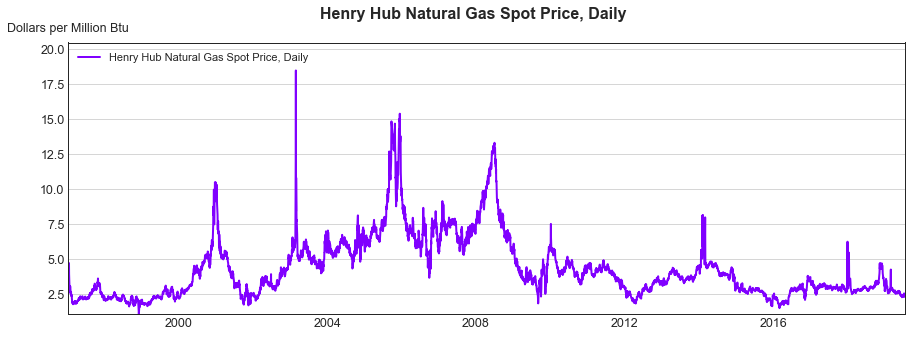

In [24]:
eia_api_key = EIA_key
url = "http://api.eia.gov/series/"

# series_id = "NG.N9100US3.M"
series_id = "NG.RNGWHHD.D"
valx, valy, title, country, unit = f_EIA_ExtractData(url,eia_api_key,series_id)
# x =  f_PlotData(valx, valy, title, unit)

df_Price_D = pd.DataFrame({'Date':valx,'Price_HH':valy})
df_Price_D["Date"] = pd.to_datetime(df_Price_D["Date"])
df_Price_D = df_Price_D.set_index("Date")

df_Price_M = df_Price_D.resample('MS').mean()
df_Price_D.to_csv("../../Data/CSV_Files/Gas_Price_HH_D.csv", encoding='utf-8')
df_Price_M.to_csv("../../Data/CSV_Files/Gas_Price_HH_M.csv", encoding='utf-8')


list_series = []
list_series.append(series_id)
f_EIA_PlotData(list_series,url,eia_api_key,title)

# list_series = list(df.loc[[1,3,5,7],"series_id"])
# f_EIA_PlotData(list_series,url,eia_api_key,"Combined EIA Series Comparison-Monthly")

# list_series = list(df.loc[[1,2,3,4,5,6,7],"series_id"])
# f_EIA_PlotData(list_series,url,eia_api_key,"Combined EIA Series Comparison-Monthly-Annualy")

In [25]:
df_Price_M

,Price_HH
Date,
1997-01-01,3.451053
1997-02-01,2.150526
1997-03-01,1.890500
1997-04-01,2.032727
1997-05-01,2.248095
1997-06-01,2.203333
1997-07-01,2.189545
1997-08-01,2.491429
1997-09-01,2.883333


In [26]:
df_natgasprice = df_natgasprice.merge(df_Price_M, how='outer', left_index=True, right_index=True)
df_natgasprice

,Price_Elec,Price_Ind,Price_Com,Price_Res,Price_HH
Date,,,,,
1981-01-01,NaN,NaN,NaN,3.94,NaN
1981-02-01,NaN,NaN,NaN,3.99,NaN
1981-03-01,NaN,NaN,NaN,4.06,NaN
1981-04-01,NaN,NaN,NaN,4.11,NaN
1981-05-01,NaN,NaN,NaN,4.29,NaN
1981-06-01,NaN,NaN,NaN,4.30,NaN
1981-07-01,NaN,NaN,NaN,4.32,NaN
1981-08-01,NaN,NaN,NaN,4.30,NaN
1981-09-01,NaN,NaN,NaN,4.47,NaN


In [27]:
df_natgasprice = df_natgasprice.dropna()

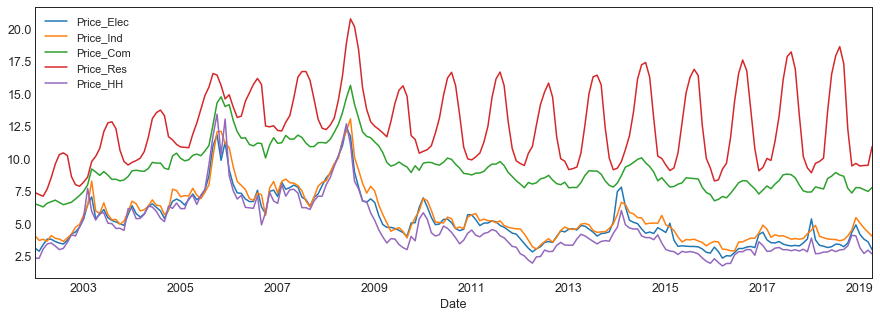

In [28]:
df_natgasprice.plot()

In [29]:
df_natgasprice.shape

(208, 5)

In [30]:
df_natgasdata

,Total,Industrial,Electric,Residential,Commercial
Date,,,,,
2001-01-01,2676.998,686.540,340.292,976.677,673.489
2001-02-01,2309.464,640.026,312.843,780.482,576.113
2001-03-01,2246.633,664.918,362.843,681.884,536.988
2001-04-01,1807.170,622.054,384.494,400.728,399.894
2001-05-01,1522.382,576.532,433.923,209.327,302.600
2001-06-01,1444.378,536.820,492.819,146.837,267.902
2001-07-01,1598.071,570.067,634.425,123.777,269.802
2001-08-01,1669.178,589.875,686.753,116.934,275.616
2001-09-01,1494.128,578.590,510.262,127.482,277.794


In [31]:
df_natgasdata = df_natgasdata.merge(df_natgasprice, how='outer', left_index=True, right_index=True)
df_natgasdata

,Total,Industrial,Electric,Residential,Commercial,Price_Elec,Price_Ind,Price_Com,Price_Res,Price_HH
Date,,,,,,,,,,
2001-01-01,2676.998,686.540,340.292,976.677,673.489,NaN,NaN,NaN,NaN,NaN
2001-02-01,2309.464,640.026,312.843,780.482,576.113,NaN,NaN,NaN,NaN,NaN
2001-03-01,2246.633,664.918,362.843,681.884,536.988,NaN,NaN,NaN,NaN,NaN
2001-04-01,1807.170,622.054,384.494,400.728,399.894,NaN,NaN,NaN,NaN,NaN
2001-05-01,1522.382,576.532,433.923,209.327,302.600,NaN,NaN,NaN,NaN,NaN
2001-06-01,1444.378,536.820,492.819,146.837,267.902,NaN,NaN,NaN,NaN,NaN
2001-07-01,1598.071,570.067,634.425,123.777,269.802,NaN,NaN,NaN,NaN,NaN
2001-08-01,1669.178,589.875,686.753,116.934,275.616,NaN,NaN,NaN,NaN,NaN
2001-09-01,1494.128,578.590,510.262,127.482,277.794,NaN,NaN,NaN,NaN,NaN


In [35]:
df_natgasdata.dropna(how='any', inplace=True)
df_natgasdata

,Total,Industrial,Electric,Residential,Commercial,Price_Elec,Price_Ind,Price_Com,Price_Res,Price_HH
Date,,,,,,,,,,
2002-01-01,2487.638,686.108,381.434,815.227,604.869,3.10,4.05,6.51,7.38,2.317619
2002-02-01,2242.427,632.621,344.243,712.863,552.700,2.86,3.70,6.40,7.23,2.323684
2002-03-01,2258.431,655.854,406.516,660.430,535.631,3.37,3.78,6.28,7.10,3.028500
2002-04-01,1880.985,646.534,404.384,415.196,414.871,3.80,3.64,6.56,7.66,3.426818
2002-05-01,1611.453,611.973,410.108,255.083,334.289,3.78,4.07,6.68,8.54,3.498182
2002-06-01,1591.373,595.674,550.941,159.973,284.785,3.61,3.86,6.80,9.58,3.261500
2002-07-01,1748.435,605.786,733.887,125.065,283.697,3.49,3.80,6.62,10.31,2.987143
2002-08-01,1725.712,611.822,717.592,115.678,280.620,3.42,3.62,6.45,10.44,3.087727
2002-09-01,1542.170,573.310,568.699,123.904,276.257,3.71,3.89,6.54,10.23,3.549000


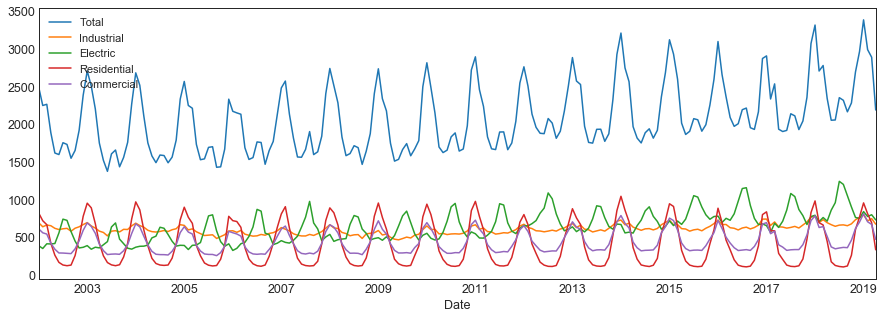

In [36]:
df_natgasdata[["Total","Industrial","Electric","Residential","Commercial"]].plot()

In [37]:
df_natgasdata.to_csv("../../Data/CSV_Files/Nat_Gas_Data.csv", encoding='utf-8')

In [ ]:
import fix_yahoo_finance as yf

start_date = "2001-01-01"
end_date = "2019-07-15"
ticker = "^GSPC" #S&P 500

df_SP = yf.download(ticker, start=start_date, end=end_date)
df_SP.to_csv("../../Data/CSV_Files/S&P.csv", encoding='utf-8')
df_SP

In [ ]:
eia_api_key = EIA_key
url = "http://api.eia.gov/series/"
series_id = "NG.N9100US3.M"

valx, valy, title, country, unit = f_EIA_ExtractData(url,eia_api_key,series_id)
label = title

large = 16; med = 12.5; small = 11
params = {'axes.titlesize': med,
        'legend.fontsize': small,
        'figure.figsize': (15, 5),
        'axes.labelsize': med,
        'axes.titlesize': med,
        'xtick.labelsize': med,
        'ytick.labelsize': med,
        'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

fig, ax = plt.subplots()
    
ax.yaxis.set_label_coords(0.00,1.03)
ax.yaxis.grid(True)

fig.suptitle(title, fontweight="bold")
ax.set_ylabel(unit, rotation=0, labelpad=20)
# ax.set_xlim(minx, maxx); ax.set_ylim(miny, maxy + 2)
# c=next(color)
ax.plot(valx,valy, linewidth=2,color="b",label=label)
ax.legend(loc='upper left')

ax_sec = ax.twinx()
# c=next(color)
valx = list(df_SP.index)
valy = df_SP["Close"]
ax_sec.plot(valx,valy, linewidth=2,color="r",label="S&P Index")
ax_sec.legend(loc='center left') 

plt.show()

In [ ]:
df_GDP = pd.read_csv("../../Data/CSV_Files/Real_GDP.csv")
valx = list(pd.to_datetime(df_GDP["DATE"]))
valy = list(df_GDP["GDPC1"])

# valx, valy, title, country, unit = f_EIA_ExtractData(url,eia_api_key,series_id)
# label = title

large = 16; med = 12.5; small = 11
params = {'axes.titlesize': med,
        'legend.fontsize': small,
        'figure.figsize': (15, 5),
        'axes.labelsize': med,
        'axes.titlesize': med,
        'xtick.labelsize': med,
        'ytick.labelsize': med,
        'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

fig, ax = plt.subplots()
    
ax.yaxis.set_label_coords(0.00,1.03)
ax.yaxis.grid(True)

fig.suptitle(title, fontweight="bold")
ax.set_ylabel(unit, rotation=0, labelpad=20)
# ax.set_xlim(minx, maxx); ax.set_ylim(miny, maxy + 2)
# c=next(color)
ax.plot(valx,valy, linewidth=2,color="b",label="Real GDP")
ax.legend(loc='upper left')

ax_sec = ax.twinx()
# c=next(color)
valx = list(df_SP.index)
valy = df_SP["Close"]
ax_sec.plot(valx,valy, linewidth=2,color="r",label="S&P Index")
ax_sec.legend(loc='center left') 

plt.show()

In [ ]:
url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
api_key = worldweather_key
#ini_date = "2009-1-1"
ini_date = "2008-7-1"
end_date = "2019-7-1"
city = "New York, NY"
out_format = "json"
NumHours = 24
unit = "F"
city = "New York, NY"

valx, valy = f_WorldWeather_ExtractData(url,api_key,ini_date,end_date,city,out_format,NumHours,unit)
title = "Average Temperature"
fig, ax = f_PlotData(valx, valy, title, unit)

# dict = {'date': valx, 'Temperature(F)': valy}
# df_Temp = pd.DataFrame(dict)
df_Temp = pd.DataFrame({'Date':valx,'Temperature(F)':valy})
df_Temp["Date"] = pd.to_datetime(df_Temp["Date"])
df_Temp = df_Temp.set_index("Date")

df_Temp_M = df_Temp.resample('MS').mean()

df_Temp.to_csv("../../Data/CSV_Files/Temperature_New_York.csv", encoding='utf-8')
df_Temp_M.to_csv("../../Data/CSV_Files/Temperature_New_York_M.csv", encoding='utf-8')

unit = "C"
valx, valy = f_WorldWeather_ExtractData(url,api_key,ini_date,end_date,city,out_format,NumHours,unit)
title = "Average Temperature"
fig, ax = f_PlotData(valx, valy, title, unit)

In [ ]:
url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
api_key = worldweather_key
#ini_date = "2009-1-1"
ini_date = "2019-1-1"
end_date = "2019-3-1"
city = "New York, NY"
out_format = "json"
NumHours = 24
unit = "F"
city = "New York, NY"

params = {
        "q": city,
        "key": api_key,
        "format": out_format,
        "tp": NumHours
    }

params["date"] = ini_date
params["enddate"] = end_date
response = requests.get(url, params=params)
data = response.json()
data